In [ ]:
#IMPORTING ALL THE NECCESSARY LIBRARIES TO THE CODE
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#CONNECTING FILE TO DRIVE TO EXRTACT AND SAVE DATA AND MODELS
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1, 224, 224, 3)
(224, 224, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 60)      4560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 60)      90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 60)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 60)      32460     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 104, 60)      32460     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 60)        0         
_________________________________________________________________
dropout (Dropout)        

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1
1
1
1
1


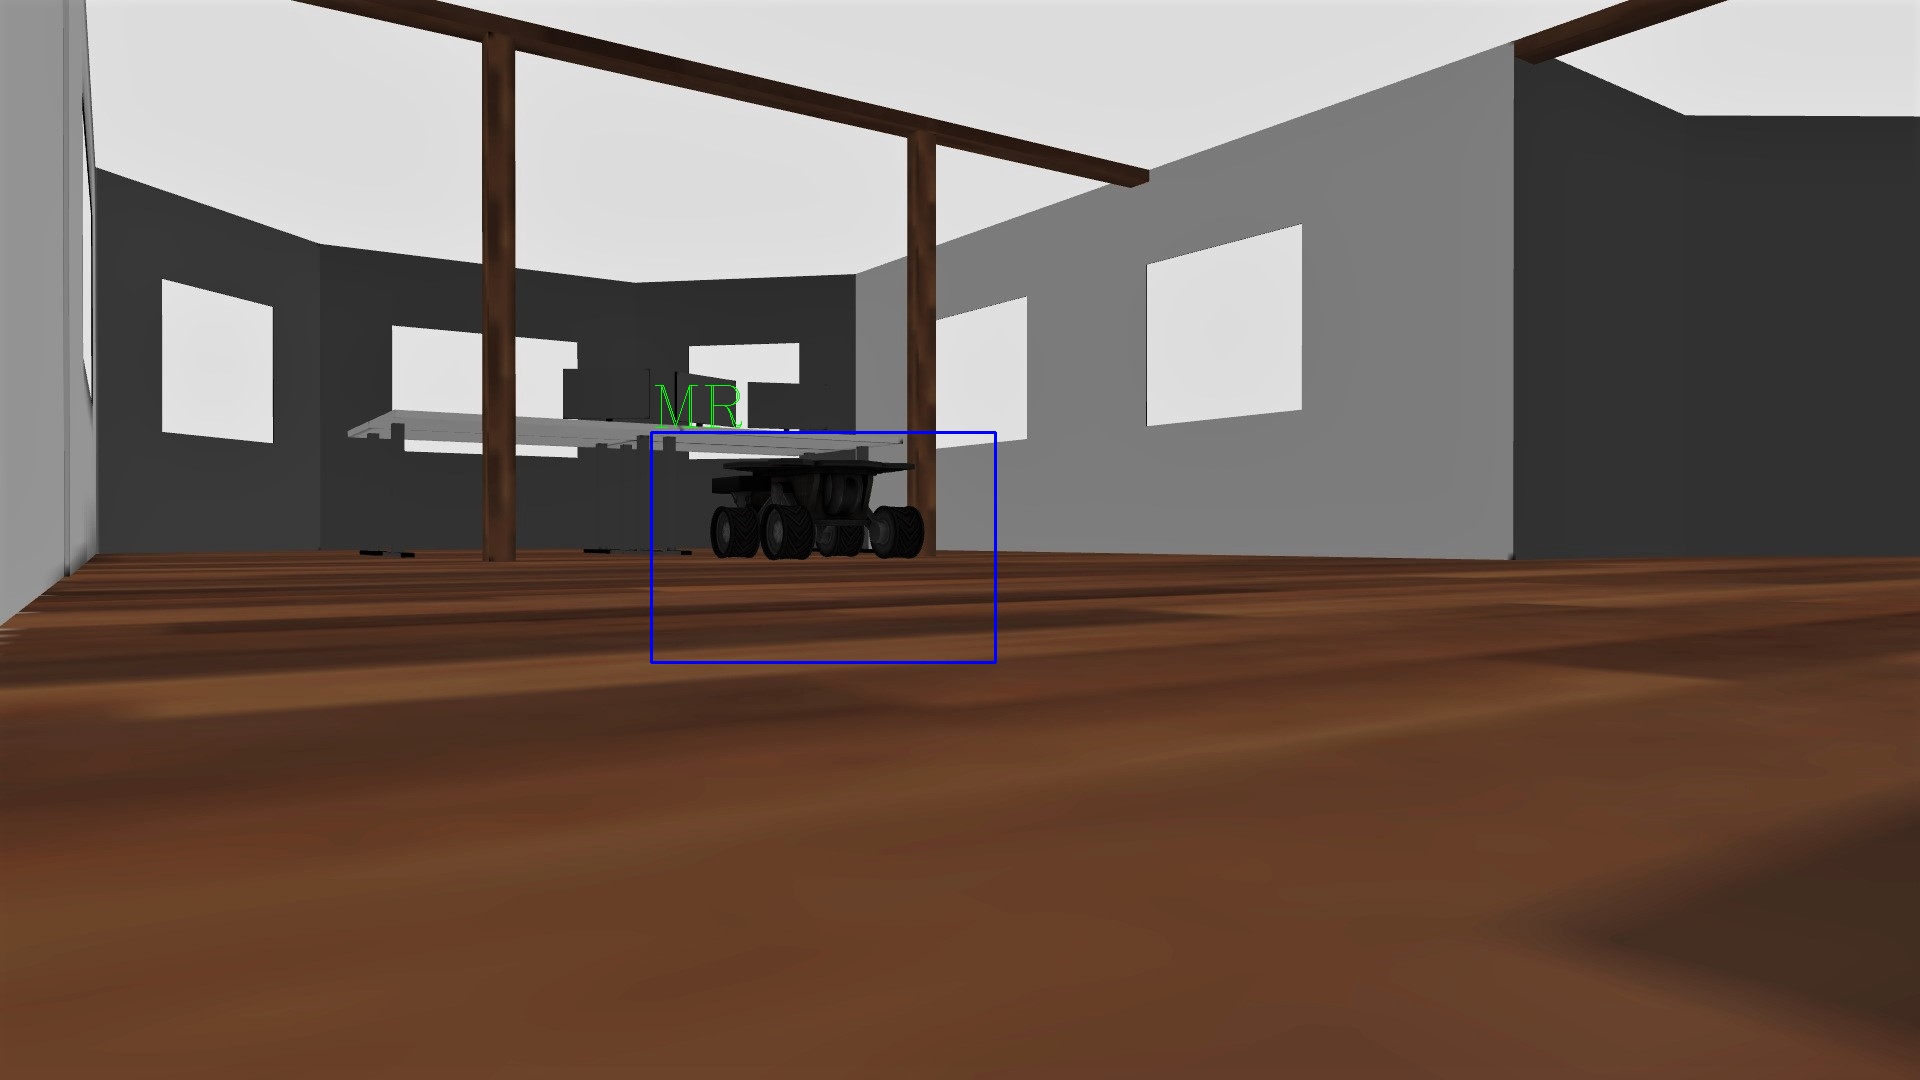

[1, 651, 432, 344, 230]


In [ ]:
#IMPORTING ALL THE PRETRAINED HAARCASCADES
bowl_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/bowl_cascade.xml')
MR_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/MR_cascade.xml')
QC_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/QC_cascade.xml')
wheel_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/Wheel_cascade.xml')

#LOADING THE PRETRAINED MODEL
from tensorflow.keras.models import load_model
model= load_model('/content/drive/MyDrive/models/CNN for RTOA.h5')

class_i=-1;
class_x=-1;
class_y=-1;
class_w=-1;
class_h=-1;

def rtoa(img):
    #1080,1920,3
    #RESIZING AND RESHAPING IMAGES SO THAT THEY ALIGN WITH 224,224,1 INPUT SHAPE OF OUR NEURAL NETWORK
  img1= tf.image.resize(img,[224,224])
  img2=tf.reshape(img1,[1,224,224,3])
  print(img2.shape)
  print(img1.shape)
  model.summary()
  #(JUST TO SEE THE INPUT SHAPE)
  #for layer in model.layers:
    #print(layer.input_shape)
  predictions= model.predict(img2)
  #PREDICTING IMAGE
  classNo1=model.predict_classes(img2)
  probabilityValue= np.amax(predictions)
  #TAKING PROBABILITY VALUE SO THAT IF PROBABILTY IS LESS THAN THRESHOLD WE CAN CALL THE IMAGE AS A NULL MEANING HAVING NONE OF THE 4 OBJECTS
  classNo=classNo1.tolist()
  #Converting to list so as to not keep the variable as a numpy array
  img1=img;
  class_i=classNo
  #just testing code in the below lines
  print(classNo[0])
  print(classNo[0])
  print(classNo[0])
  print(classNo[0])
  print(classNo[0])
  #THE TWO LAYERS OF DETECTION HERE AS IN THE HAARCASCADE AND THE NEURAL NETWORK ARE REVERSED AND THE NEURAL NETWORK WHICH WILL TELL US WHICH OBJECT IS THERE ON THE SCREEN AS THERE
  #WOULD BE ONLY ONE AS THAT IS HOW THE PLACEMENT OF OBJECTS IS IN THE ENVIRONMENT, AND THEN THE HAARCASCADE WOULD RUN TO TELL US WHICH OBJECT IT IS
  #detectMultiScale() being the most inportant function here as it tells us which object is present from the haarcascade and where it is present
  if classNo[0] is 0:
    bowl = bowl_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in bowl:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.putText(img1,'Bowl',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows() 
        ans=[classNo[0],x,y,w,h]
        return ans
  if classNo[0] is 1:
    MR = MR_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in MR:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(img1,'MR',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows()
        ans=[classNo[0],x,y,w,h]
        return ans
  if classNo[0] is 2:
    QC = QC_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in QC:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(img1,'QC',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows()
        ans=[classNo[0],x,y,w,h]
        return ans
  if classNo[0] is 3:
    Wheel = wheel_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in Wheel:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(255,255,0),2)
        cv2.putText(img1,'Wheel',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows()
        ans=[classNo[0],x,y,w,h]
        return ans

img1= cv2.imread('/content/drive/MyDrive/cascade testing images/sample6.jpg')
ans=rtoa(img1)
print(ans)